In [42]:
from keras.models import Model
from keras.layers import Input
from keras.applications.vgg19 import VGG19
import keras.backend as K

import numpy as np
from skimage import data, io
from matplotlib import pyplot as plt

In [80]:
img_shape = (1080, 1920, 3)

In [81]:
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=img_shape)

In [82]:
# model size
int(np.sum([np.prod(np.array([s if isinstance(s, int) else 1 for s in l.output_shape])) for l in vgg19.layers])) * 4 / 1024 / 1024

2605.72265625

In [83]:
vgg19.layers[-1].output_shape

(None, 33, 60, 512)

In [95]:
image = data.imread("../images/photo_fullhd/0000_2666_1500.jpg")

images = []
images.append(image)
images = np.array(images)
images = ((images - 127.5)/2)

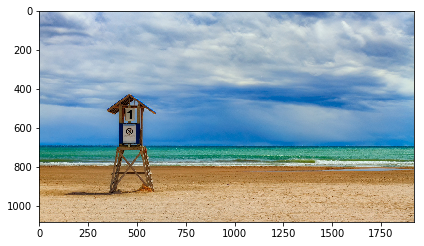

In [96]:
io.imshow(image/255)
plt.show()

In [104]:
vgg_out = vgg19.predict(images)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


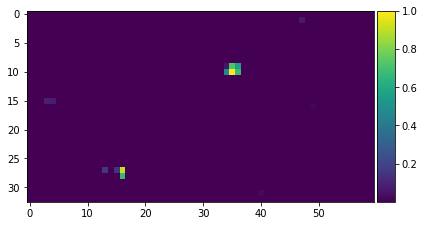

In [184]:
lay_start = 102

out = vgg_out[0,:,:,lay_start]
out = (out - np.amin(out) + 1e-7) / (np.amax(out) - np.amin(out) + 1e-7)

io.imshow(out)
plt.show()

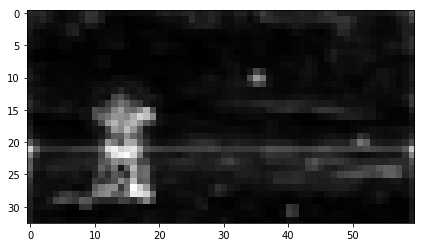

In [195]:
out = vgg_out[0]
out = out.mean(axis=2)

out = (out - np.amin(out) + 1e-7) / (np.amax(out) - np.amin(out) + 1e-7)

io.imshow(out)
plt.show()

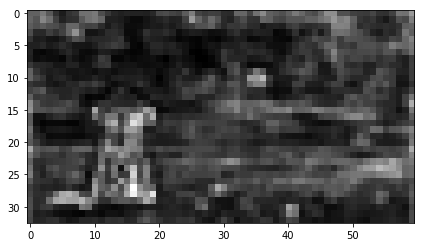

In [215]:
out = vgg_out[0]
out = np.sign(out)
#out = np.greater(out, 4)
out = np.mean(out, axis=2)

out = (out - np.amin(out) + 1e-7) / (np.amax(out) - np.amin(out) + 1e-7)

io.imshow(out)
plt.show()